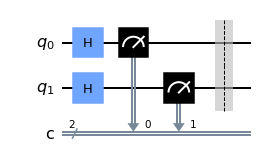

In [1]:
# Quantum Random Number Generator

# Packages
from qiskit import Aer, QuantumCircuit

# Basic Circuit
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.h(1)
circuit.measure([0,1],[0,1])
circuit.barrier()
display(circuit.draw('mpl'))